In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
from time import time

# 使用tensorflow自带的数据集
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# 设置每次批次的数量
batch_size = 55000
batch_count = mnist.train.num_examples // batch_size
print("batch_count",batch_count)

# 定义初始化两个placeholder初始化自变量,用来存放x和y的真实值
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

# 初始化随机数W和b
W = tf.Variable(tf.random_gamma([784,10],1))
b = tf.Variable(tf.random_gamma([10],1))
# W = tf.Variable(tf.zeros([784,10]))
# b = tf.Variable(tf.zeros([10]))
# theta = tf.Variable(tf.matmul(x,W) + b)
# 创建softmax函数
y_pred = tf.nn.softmax(tf.matmul(x,W) + b)

# 初始化变量
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

batch_count 1


In [3]:
# 定义交叉熵损失函数
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.matmul(x,W) + b,labels=y_pred))
# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 开始迭代寻找最优解
MAX_ITER = 3000

# 存放预测的结果
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

#存放预测结果与真值的距离
W_all = []
b_all = []
accuracy_all = []
starttime = time()
for i in range(2000):
    for batch in range(batch_count):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step,feed_dict={x:batch_xs,y_pred:batch_ys})
    W_all.append(W.eval())
    b_all.append(b.eval())
    acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    accuracy_all.append(acc)
    print("Iteration ",i," accuracy ",acc)
stoptime = time()
print(str(stoptime-starttime) + "秒")

Iteration  0  accuracy  0.192
Iteration  1  accuracy  0.2017
Iteration  2  accuracy  0.2088
Iteration  3  accuracy  0.2163
Iteration  4  accuracy  0.2234
Iteration  5  accuracy  0.2311
Iteration  6  accuracy  0.2357
Iteration  7  accuracy  0.2395
Iteration  8  accuracy  0.2434
Iteration  9  accuracy  0.2457
Iteration  10  accuracy  0.2494
Iteration  11  accuracy  0.2524
Iteration  12  accuracy  0.2548
Iteration  13  accuracy  0.2575
Iteration  14  accuracy  0.259
Iteration  15  accuracy  0.262
Iteration  16  accuracy  0.2657
Iteration  17  accuracy  0.2686
Iteration  18  accuracy  0.2731
Iteration  19  accuracy  0.276
Iteration  20  accuracy  0.2792
Iteration  21  accuracy  0.2823
Iteration  22  accuracy  0.2856
Iteration  23  accuracy  0.2894
Iteration  24  accuracy  0.2934
Iteration  25  accuracy  0.2967
Iteration  26  accuracy  0.2992
Iteration  27  accuracy  0.3021
Iteration  28  accuracy  0.3053
Iteration  29  accuracy  0.309
Iteration  30  accuracy  0.3122
Iteration  31  accuracy

Iteration  253  accuracy  0.6731
Iteration  254  accuracy  0.6735
Iteration  255  accuracy  0.6742
Iteration  256  accuracy  0.6747
Iteration  257  accuracy  0.6753
Iteration  258  accuracy  0.6764
Iteration  259  accuracy  0.6772
Iteration  260  accuracy  0.6779
Iteration  261  accuracy  0.6787
Iteration  262  accuracy  0.6788
Iteration  263  accuracy  0.6793
Iteration  264  accuracy  0.6804
Iteration  265  accuracy  0.6805
Iteration  266  accuracy  0.6808
Iteration  267  accuracy  0.681
Iteration  268  accuracy  0.6812
Iteration  269  accuracy  0.6816
Iteration  270  accuracy  0.6827
Iteration  271  accuracy  0.6833
Iteration  272  accuracy  0.6839
Iteration  273  accuracy  0.6844
Iteration  274  accuracy  0.6853
Iteration  275  accuracy  0.6856
Iteration  276  accuracy  0.6862
Iteration  277  accuracy  0.6866
Iteration  278  accuracy  0.6871
Iteration  279  accuracy  0.6876
Iteration  280  accuracy  0.6886
Iteration  281  accuracy  0.6889
Iteration  282  accuracy  0.6897
Iteration  

Iteration  503  accuracy  0.7609
Iteration  504  accuracy  0.7613
Iteration  505  accuracy  0.7616
Iteration  506  accuracy  0.7616
Iteration  507  accuracy  0.7617
Iteration  508  accuracy  0.7621
Iteration  509  accuracy  0.7625
Iteration  510  accuracy  0.7626
Iteration  511  accuracy  0.7627
Iteration  512  accuracy  0.763
Iteration  513  accuracy  0.7635
Iteration  514  accuracy  0.7636
Iteration  515  accuracy  0.7641
Iteration  516  accuracy  0.7642
Iteration  517  accuracy  0.7643
Iteration  518  accuracy  0.7643
Iteration  519  accuracy  0.7645
Iteration  520  accuracy  0.7646
Iteration  521  accuracy  0.7648
Iteration  522  accuracy  0.7649
Iteration  523  accuracy  0.7653
Iteration  524  accuracy  0.7657
Iteration  525  accuracy  0.7658
Iteration  526  accuracy  0.766
Iteration  527  accuracy  0.766
Iteration  528  accuracy  0.7659
Iteration  529  accuracy  0.766
Iteration  530  accuracy  0.766
Iteration  531  accuracy  0.7662
Iteration  532  accuracy  0.7665
Iteration  533 

Iteration  753  accuracy  0.7971
Iteration  754  accuracy  0.7973
Iteration  755  accuracy  0.7973
Iteration  756  accuracy  0.7973
Iteration  757  accuracy  0.7973
Iteration  758  accuracy  0.7973
Iteration  759  accuracy  0.7975
Iteration  760  accuracy  0.7975
Iteration  761  accuracy  0.7976
Iteration  762  accuracy  0.7977
Iteration  763  accuracy  0.7979
Iteration  764  accuracy  0.798
Iteration  765  accuracy  0.7982
Iteration  766  accuracy  0.7982
Iteration  767  accuracy  0.7985
Iteration  768  accuracy  0.7987
Iteration  769  accuracy  0.7987
Iteration  770  accuracy  0.7989
Iteration  771  accuracy  0.7991
Iteration  772  accuracy  0.7991
Iteration  773  accuracy  0.7991
Iteration  774  accuracy  0.7992
Iteration  775  accuracy  0.7993
Iteration  776  accuracy  0.7993
Iteration  777  accuracy  0.7994
Iteration  778  accuracy  0.7994
Iteration  779  accuracy  0.7994
Iteration  780  accuracy  0.7995
Iteration  781  accuracy  0.7996
Iteration  782  accuracy  0.7997
Iteration  

Iteration  1002  accuracy  0.814
Iteration  1003  accuracy  0.8141
Iteration  1004  accuracy  0.8141
Iteration  1005  accuracy  0.8142
Iteration  1006  accuracy  0.8142
Iteration  1007  accuracy  0.8143
Iteration  1008  accuracy  0.8146
Iteration  1009  accuracy  0.8147
Iteration  1010  accuracy  0.8147
Iteration  1011  accuracy  0.8147
Iteration  1012  accuracy  0.8147
Iteration  1013  accuracy  0.8148
Iteration  1014  accuracy  0.8148
Iteration  1015  accuracy  0.8149
Iteration  1016  accuracy  0.8149
Iteration  1017  accuracy  0.8149
Iteration  1018  accuracy  0.8149
Iteration  1019  accuracy  0.815
Iteration  1020  accuracy  0.8151
Iteration  1021  accuracy  0.8151
Iteration  1022  accuracy  0.8151
Iteration  1023  accuracy  0.8151
Iteration  1024  accuracy  0.8151
Iteration  1025  accuracy  0.8151
Iteration  1026  accuracy  0.8152
Iteration  1027  accuracy  0.8154
Iteration  1028  accuracy  0.8155
Iteration  1029  accuracy  0.8155
Iteration  1030  accuracy  0.8158
Iteration  1031 

Iteration  1245  accuracy  0.8256
Iteration  1246  accuracy  0.8258
Iteration  1247  accuracy  0.8258
Iteration  1248  accuracy  0.8259
Iteration  1249  accuracy  0.8259
Iteration  1250  accuracy  0.8259
Iteration  1251  accuracy  0.8259
Iteration  1252  accuracy  0.826
Iteration  1253  accuracy  0.8259
Iteration  1254  accuracy  0.8259
Iteration  1255  accuracy  0.8259
Iteration  1256  accuracy  0.8259
Iteration  1257  accuracy  0.826
Iteration  1258  accuracy  0.826
Iteration  1259  accuracy  0.8261
Iteration  1260  accuracy  0.8263
Iteration  1261  accuracy  0.8264
Iteration  1262  accuracy  0.8264
Iteration  1263  accuracy  0.8264
Iteration  1264  accuracy  0.8265
Iteration  1265  accuracy  0.8265
Iteration  1266  accuracy  0.8267
Iteration  1267  accuracy  0.8267
Iteration  1268  accuracy  0.8267
Iteration  1269  accuracy  0.8268
Iteration  1270  accuracy  0.8268
Iteration  1271  accuracy  0.8268
Iteration  1272  accuracy  0.827
Iteration  1273  accuracy  0.827
Iteration  1274  ac

Iteration  1487  accuracy  0.8343
Iteration  1488  accuracy  0.8343
Iteration  1489  accuracy  0.8344
Iteration  1490  accuracy  0.8345
Iteration  1491  accuracy  0.8346
Iteration  1492  accuracy  0.8346
Iteration  1493  accuracy  0.8346
Iteration  1494  accuracy  0.8347
Iteration  1495  accuracy  0.8347
Iteration  1496  accuracy  0.8348
Iteration  1497  accuracy  0.8349
Iteration  1498  accuracy  0.8349
Iteration  1499  accuracy  0.8348
Iteration  1500  accuracy  0.8348
Iteration  1501  accuracy  0.8348
Iteration  1502  accuracy  0.835
Iteration  1503  accuracy  0.835
Iteration  1504  accuracy  0.835
Iteration  1505  accuracy  0.835
Iteration  1506  accuracy  0.835
Iteration  1507  accuracy  0.8351
Iteration  1508  accuracy  0.8351
Iteration  1509  accuracy  0.8351
Iteration  1510  accuracy  0.8351
Iteration  1511  accuracy  0.8351
Iteration  1512  accuracy  0.8351
Iteration  1513  accuracy  0.8351
Iteration  1514  accuracy  0.8352
Iteration  1515  accuracy  0.8352
Iteration  1516  ac

Iteration  1730  accuracy  0.8424
Iteration  1731  accuracy  0.8425
Iteration  1732  accuracy  0.8426
Iteration  1733  accuracy  0.8426
Iteration  1734  accuracy  0.8426
Iteration  1735  accuracy  0.8425
Iteration  1736  accuracy  0.8425
Iteration  1737  accuracy  0.8425
Iteration  1738  accuracy  0.8424
Iteration  1739  accuracy  0.8424
Iteration  1740  accuracy  0.8424
Iteration  1741  accuracy  0.8425
Iteration  1742  accuracy  0.8424
Iteration  1743  accuracy  0.8424
Iteration  1744  accuracy  0.8424
Iteration  1745  accuracy  0.8424
Iteration  1746  accuracy  0.8424
Iteration  1747  accuracy  0.8424
Iteration  1748  accuracy  0.8425
Iteration  1749  accuracy  0.8426
Iteration  1750  accuracy  0.8426
Iteration  1751  accuracy  0.8426
Iteration  1752  accuracy  0.8426
Iteration  1753  accuracy  0.8426
Iteration  1754  accuracy  0.8427
Iteration  1755  accuracy  0.8428
Iteration  1756  accuracy  0.8427
Iteration  1757  accuracy  0.8427
Iteration  1758  accuracy  0.8428
Iteration  175

Iteration  1972  accuracy  0.8491
Iteration  1973  accuracy  0.8491
Iteration  1974  accuracy  0.8492
Iteration  1975  accuracy  0.8492
Iteration  1976  accuracy  0.8493
Iteration  1977  accuracy  0.8493
Iteration  1978  accuracy  0.8494
Iteration  1979  accuracy  0.8494
Iteration  1980  accuracy  0.8494
Iteration  1981  accuracy  0.8494
Iteration  1982  accuracy  0.8495
Iteration  1983  accuracy  0.8495
Iteration  1984  accuracy  0.8495
Iteration  1985  accuracy  0.8496
Iteration  1986  accuracy  0.8497
Iteration  1987  accuracy  0.8497
Iteration  1988  accuracy  0.8497
Iteration  1989  accuracy  0.8497
Iteration  1990  accuracy  0.8497
Iteration  1991  accuracy  0.8496
Iteration  1992  accuracy  0.8496
Iteration  1993  accuracy  0.8496
Iteration  1994  accuracy  0.8496
Iteration  1995  accuracy  0.8496
Iteration  1996  accuracy  0.8496
Iteration  1997  accuracy  0.8496
Iteration  1998  accuracy  0.8497
Iteration  1999  accuracy  0.8497
2930.2309141159058秒


In [4]:
def normalize(image_in):
    m, n = image_in.shape
    Dmax = image_in.max()
    Dmin = image_in.min()
    Dlen = Dmax - Dmin
    image_out = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            image_out[i][j] = np.uint8(255 * (image_in[i][j] - Dmin) / Dlen)
    return image_out

In [5]:
W_val = np.array(W.eval()).T
tmp = W_val[0].reshape([28,28])
tmp = np.uint8(normalize(tmp))
from PIL import Image
im = Image.fromarray(tmp,'L')
im

# 画出曲线

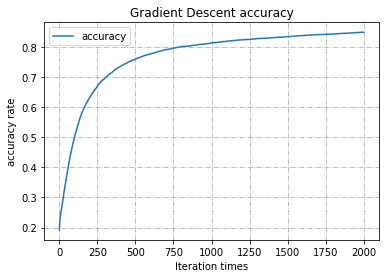

In [6]:
plt.cla()
plt.title("Gradient Descent accuracy")
plt.plot(accuracy_all,label='accuracy')
plt.grid(axis='x', linestyle='-.')
plt.grid(axis='y', linestyle='-.')
plt.xlabel("Iteration times")
plt.ylabel("accuracy rate")
plt.legend()
# plt.show()
plt.savefig("accuracy with iteration time")

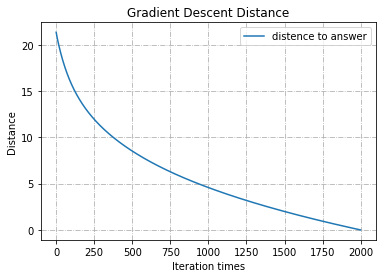

In [7]:
dist_w = []
for i in range(len(W_all)):
    dist_w.append(tf.linalg.norm(W_all[i]-W.eval()).eval())
    
plt.cla()
plt.title("Gradient Descent Distance")
plt.plot(dist_w,label = 'distence to answer')
plt.grid(axis = 'x', linestyle = '-.')
plt.grid(axis = 'y', linestyle = '-.')
plt.xlabel("Iteration times")
plt.ylabel("Distance")
plt.legend()
# plt.show()
plt.savefig("Distance with iteration time")

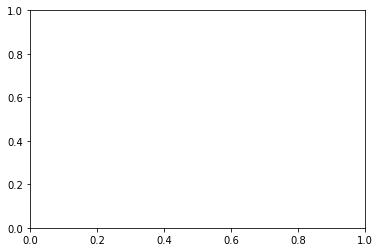

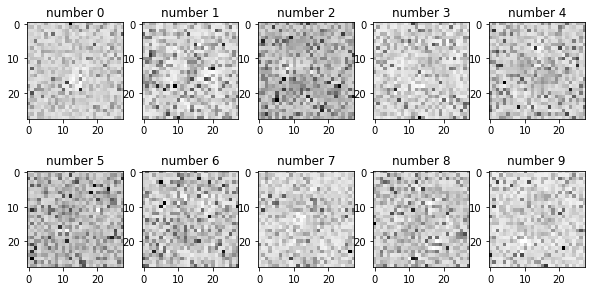

In [8]:
plt.cla()
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes()
frame = plt.gca()
W_data = W_all[-1]
for i in range(10):
    img = np.array(W_data[:,i])
    img = np.reshape(img,[28,28])
    img = np.uint8(normalize(img))
    plt.subplot(2,5,i+1) #要生成两行两列，这是第一个图plt.subplot('行','列','编号')
    plt.title("number " + str(i))
    plt.imshow(img,cmap = 'gray_r')
fig.savefig("matrix",dpi = 200)